In [1]:
import malaya

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
article = """
Kegagalan kerajaan Pakatan Harapan (PH) untuk berinteraksi dengan orang awam menyebabkan ia tidak dapat menyekat bantahan terhadap rancangan meratifikasi Konvensyen Antarabangsa mengenai Penghapusan Segala Bentuk Diskriminasi Kaum (Icerd), kata Khairy Jamaluddin.

Dalam wawancara bersama "R.AGE", bekas menteri belia dan sukan itu berkata beliau percaya kerajaan dapat meneruskan rancangan itu jika melakukan perbincangan dan interaksi (engagement) yang cukup dengan orang ramai.

"Ia boleh dilakukan, tetapi ia perlu melalui penerangan berterusan (syndication) yang banyak dengan orang awam.

"Kita perlu faham bagaimana pengecualian dan penilaian dibuat, sama ada ia terikat dengan masa...," katanya seperti dipetik sisipan akhbar "The Star" itu, hari ini.

"Ini adalah persoalan kompleks dan melainkan anda ada pemahaman yang baik atau penerangan yang luas tentang Icerd, ia akan dilihat melalui perspektif negatif sebagai sesuatu yang sama sekali tidak diterima orang ramai orang Melayu dan Islam," katanya lagi.

Beliau mendakwa usahanya untuk memberi amaran kepada kerajaan tentang kemarahan yang mungkin tercetus akibat rancangan itu diabaikan.

Pada Disember lalu, kira-kira 50000 membanjiri Kuala Lumpur untuk menyertai himpunan yang pada mulanya untuk membantah rancangan itu.

Ia kemudian menjadi acara kesyukuran selepas kerajaan mengumumkan tidak akan meratifikasi Icerd.

Malaysia merupakan satu daripada dua negara majoriti Muslim di dunia yang tidak meratifikasi konvensyen PBB tersebut.

Pihak yang membantahnya berkata ia boleh mengancam kedudukan Islam sebagai agama persekutuan dan hak istimewa bumiputera.

Mereka yang menyokongnya pula berkata ia boleh diratifikasi dengan pengecualian terhadap beberapa kandungannya.

'Kedudukan istimewa Melayu tak terancam'

Mengulas lanjut, Khairy yang juga bekas ketua pemuda Umno berkata beliau secara peribadi tidak merasakan hak istimewa Melayu akan terancam di bawah konvensyen itu.

"Tetapi ada kebimbangan bahawa isu yang dianggap sensitif oleh masyarakat Melayu kini boleh disentuh oleh ramai orang.

"Ada banyak retorik (menyerang) agenda Melayu dan Islam, dan ia satu kebimbangan yang real di kalangan masyarakat Melayu," katanya lagi.

Khairy sebelum ini pernah membangkitkan soal kedudukan Melayu dan Islam jika kerajaan meratifikasi Icerd ketika perbahasan Parlimen pada 15 Oktober lalu.
Menurut "The Malay Mail", Khairy membangkitkan Artikel 2 Icerd berkenaan penamatan semua bentuk diskriminasi kaum dan Perkara 153 Perlembagaan Persekutuan berkenaan hak Istimewa Melayu dan Bumiputera.

"Adakah kita sedar implikasi dasar ini? Kita tidak ratifikasi (Icerd) kerana ia selari dengan Perlembagaan Persekutuan yang memberikan hak istimewa kepada satu kaum. Impak (ratifikasi) konvensyen antarabangsa ini adalah kita perlu kuatkuasakan sebagai undang-undang.

"Adakah ini bermakna Perkara 153 Perlembagaan Persekutuan akan ada tempoh masa, kerana konvensyen jelas menyatakan sebarang bentuk diskriminasi positif terhadap minoriti perlu ada tempoh masa?

"Bagaimanapun ini tidak bermakna saya setuju, atau pun tidak setuju, dengannya," kata Khairy seperti dipetik.
"""

In [4]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(article)
for i, sentence in enumerate(sentences):
    sentences[i] = sentence.replace("\n","")
sentences

['Kegagalan kerajaan Pakatan Harapan (PH) untuk berinteraksi dengan orang awam menyebabkan ia tidak dapat menyekat bantahan terhadap rancangan meratifikasi Konvensyen Antarabangsa mengenai Penghapusan Segala Bentuk Diskriminasi Kaum (Icerd), kata Khairy Jamaluddin.',
 'Dalam wawancara bersama "R.AGE", bekas menteri belia dan sukan itu berkata beliau percaya kerajaan dapat meneruskan rancangan itu jika melakukan perbincangan dan interaksi (engagement) yang cukup dengan orang ramai.',
 '"Ia boleh dilakukan, tetapi ia perlu melalui penerangan berterusan (syndication) yang banyak dengan orang awam.',
 '"Kita perlu faham bagaimana pengecualian dan penilaian dibuat, sama ada ia terikat dengan masa...," katanya seperti dipetik sisipan akhbar "The Star" itu, hari ini.',
 '"Ini adalah persoalan kompleks dan melainkan anda ada pemahaman yang baik atau penerangan yang luas tentang Icerd, ia akan dilihat melalui perspektif negatif sebagai sesuatu yang sama sekali tidak diterima orang ramai orang M

In [5]:
entity_network = malaya.entity.deep_model('entity-network')
bahdanau = malaya.entity.deep_model('bahdanau')
luong = malaya.entity.deep_model('luong')
crf = malaya.entity.crf()

In [6]:
entity_links = pd.DataFrame()
for sentence in sentences:
    temp = pd.DataFrame(malaya.stack.voting_stack([entity_network, bahdanau, luong], sentence))
    entities = temp[temp[1]!='OTHER']
    ent = entities[0].tolist()
    typ = entities[1].tolist()
    for i in range(len(ent)):
        count = i
        for j in range(len(ent)-1-i):
            count += 1
            entity_links = entity_links.append({typ[i]+'0':ent[i],typ[count]+'1':ent[count]},ignore_index=True)
print(entity_links)

   organization0 organization1     person1 person0     time0    time1  \
0        pakatan       harapan         NaN     NaN       NaN      NaN   
1        pakatan            ph         NaN     NaN       NaN      NaN   
2        pakatan           NaN      khairy     NaN       NaN      NaN   
3        pakatan           NaN  jamaluddin     NaN       NaN      NaN   
4        harapan            ph         NaN     NaN       NaN      NaN   
5        harapan           NaN      khairy     NaN       NaN      NaN   
6        harapan           NaN  jamaluddin     NaN       NaN      NaN   
7             ph           NaN      khairy     NaN       NaN      NaN   
8             ph           NaN  jamaluddin     NaN       NaN      NaN   
9            NaN           NaN  jamaluddin  khairy       NaN      NaN   
10           NaN           NaN       islam  melayu       NaN      NaN   
11           NaN           NaN         NaN     NaN  disember     lalu   
12           NaN           NaN         NaN     NaN 

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

In [9]:
# G = nx.Graph()
# node_list
li = []
t = []
cols = entity_links.columns
for col in cols:
    entity = entity_links[col]
    entity = entity[entity.isna()==False].unique().tolist()
    for ent in entity:
        if ent not in li:
            li.append(ent)
            t.append(col[:-1])
li = pd.Series(li)
print(li,t)

0          pakatan
1          harapan
2               ph
3         himpunan
4             yang
5              pbb
6           khairy
7       jamaluddin
8            islam
9            ketua
10          pemuda
11            umno
12          melayu
13           icerd
14        disember
15            lalu
16           50000
17              15
18         oktober
19           kuala
20          lumpur
21        malaysia
22             153
23    perlembagaan
24     persekutuan
dtype: object ['organization', 'organization', 'organization', 'organization', 'organization', 'organization', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'time', 'time', 'time', 'time', 'time', 'location', 'location', 'location', 'law', 'law', 'law']


In [10]:
unique_t = pd.Series(t).unique().tolist()
color_dict = {unique_t[0]:'red',unique_t[1]:'orange',unique_t[2]:'yellow',unique_t[3]:'green',unique_t[4]:'blue'}
colors = []
for thing in t:
    colors.append(color_dict[thing])

In [11]:
edges = []
for i in range(len(entity_links)):
    row = entity_links.iloc[i]
    row = row[row.isna()==False]
    edges.append(row.tolist())

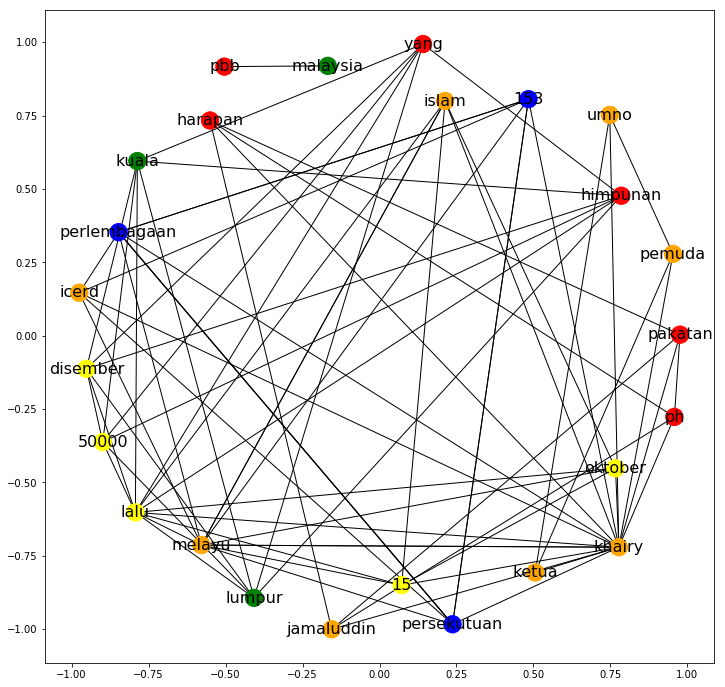

In [12]:
plt.figure(figsize=(12,12))
G = nx.Graph()
node_list = li.unique()
for node in node_list:
    G.add_node(node)
    
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color=colors)

labels = {}
for node_name in node_list:
    labels[str(node_name)] = str(node_name)
nx.draw_networkx_labels(G,pos,labels,font_size=16)

# edges = [('pakatan','harapan')]
nx.draw_networkx_edges(G,pos,edgelist=edges)
plt.show()